In [4]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner
from random import random
import numpy as np
from numpy.random import randint
from mlxtend.plotting import plot_decision_regions

In [2]:
pwd = os.getcwd()
dt = pd.read_csv(r"" + "../ECG_Classification_project/ECG_Classification_data6.csv", index_col="Unnamed: 0")
dt.drop(columns=["Age", "Sex"], inplace=True)
dt.head()

,PR,RT,PR/RT,P,Q,R,S,T,Person,FFT_max_1_Pwr,FFT_max_1_F,FFT_max_2_Pwr,FFT_max_2_F,FFT_max_3_Pwr,FFT_max_3_F
0,78.0,520.0,0.150000,0.079214,-0.041867,0.620765,-0.206921,0.127458,1,0.003697,5.4,0.006743,1.30,0.006074,1.05
1,72.0,484.0,0.148760,0.124475,-0.079098,0.755076,-0.274602,0.222435,1,0.011662,5.3,0.012722,3.95,0.015075,1.35
2,74.0,512.0,0.144531,0.117295,-0.063976,0.820487,-0.269289,0.228828,1,0.007289,4.8,0.006683,3.95,0.022030,1.25
3,77.5,509.5,0.152110,0.121821,-0.053912,0.803834,-0.228796,0.219835,1,0.018975,5.1,0.016028,3.80,0.035605,1.25
4,78.0,490.0,0.159184,0.121741,-0.072340,0.810754,-0.258807,0.219650,1,0.010427,4.9,0.009933,3.70,0.022351,1.25


In [3]:
len(dt)

199

In [4]:
dt = dt.groupby('Person').filter(lambda x : len(x) > 2)
dt["Person"].value_counts()

Person
2     22
52    11
1      7
63     6
30     5
59     5
46     5
36     5
35     5
34     5
28     5
25     5
3      5
32     4
26     4
40     4
51     4
9      4
61     4
71     4
27     3
16     3
10     3
57     3
64     3
Name: count, dtype: int64

In [5]:
len(dt)

134

In [6]:
ids = list(set(list(dt["Person"])))
ids.sort()
swap_ids = {}
for old_id, new_id in zip(ids, range(len(ids))):
    swap_ids[old_id] = new_id

dt["Person"] = dt["Person"].apply(lambda x: swap_ids[x])

dt["Person"].value_counts()

Person
1     22
18    11
0      7
22     6
10     5
20     5
16     5
14     5
13     5
12     5
9      5
6      5
2      5
11     4
7      4
15     4
17     4
3      4
21     4
24     4
8      3
5      3
4      3
19     3
23     3
Name: count, dtype: int64

In [7]:
len(dt["Person"].value_counts())

25

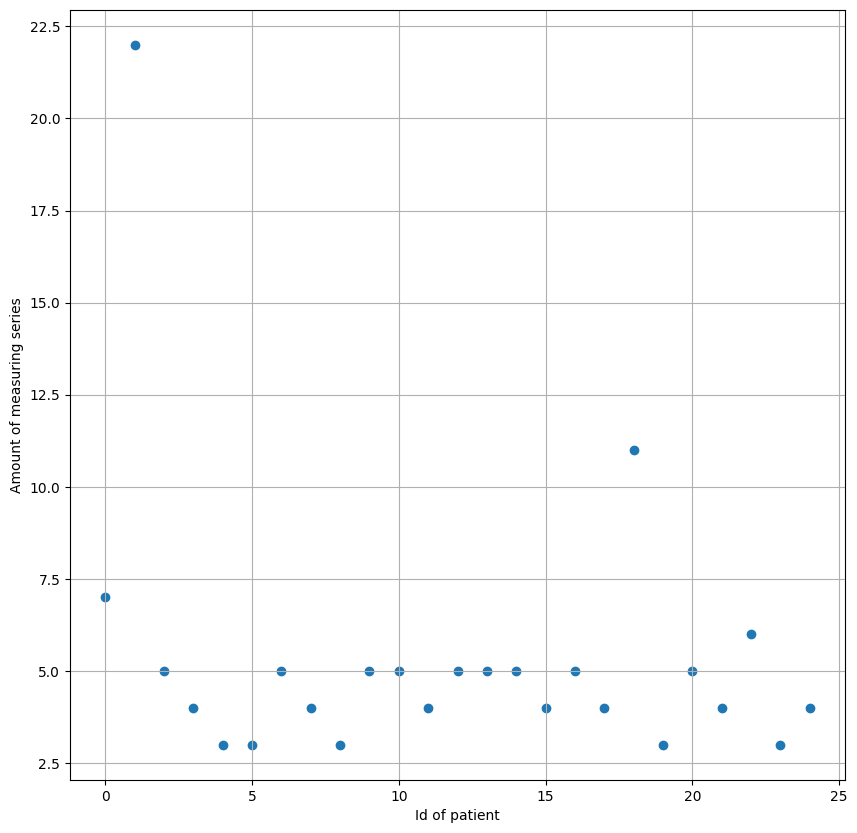

In [8]:
val_cnts = dt["Person"].value_counts()
plt.figure(figsize=(10, 10))
plt.scatter(x = val_cnts.index, y = val_cnts.values)
plt.xlabel("Id of patient")
plt.ylabel("Amount of measuring series")
plt.grid(visible=True)

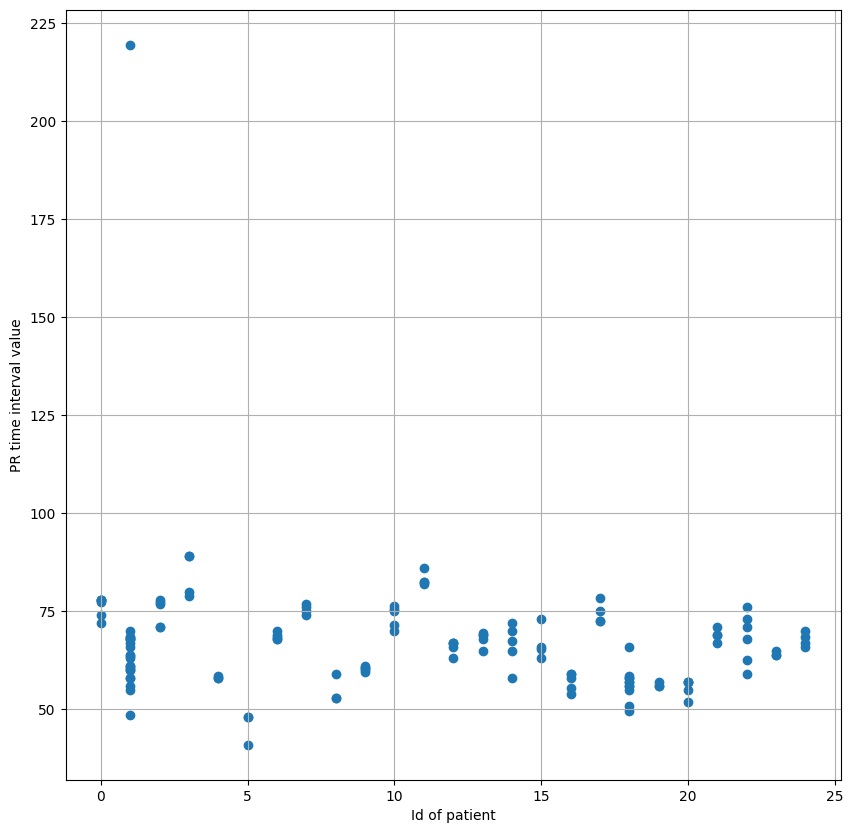

In [32]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["PR"])
plt.xlabel("Id of patient")
plt.ylabel("PR time interval value")
plt.grid()

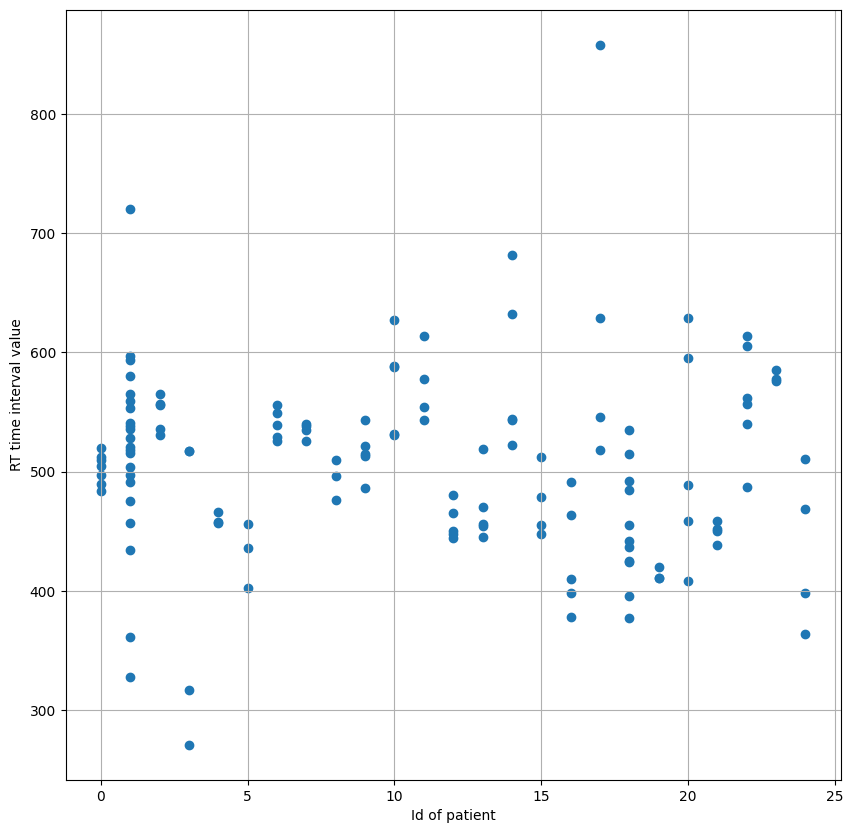

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["RT"])
plt.xlabel("Id of patient")
plt.ylabel("RT time interval value")
plt.grid()

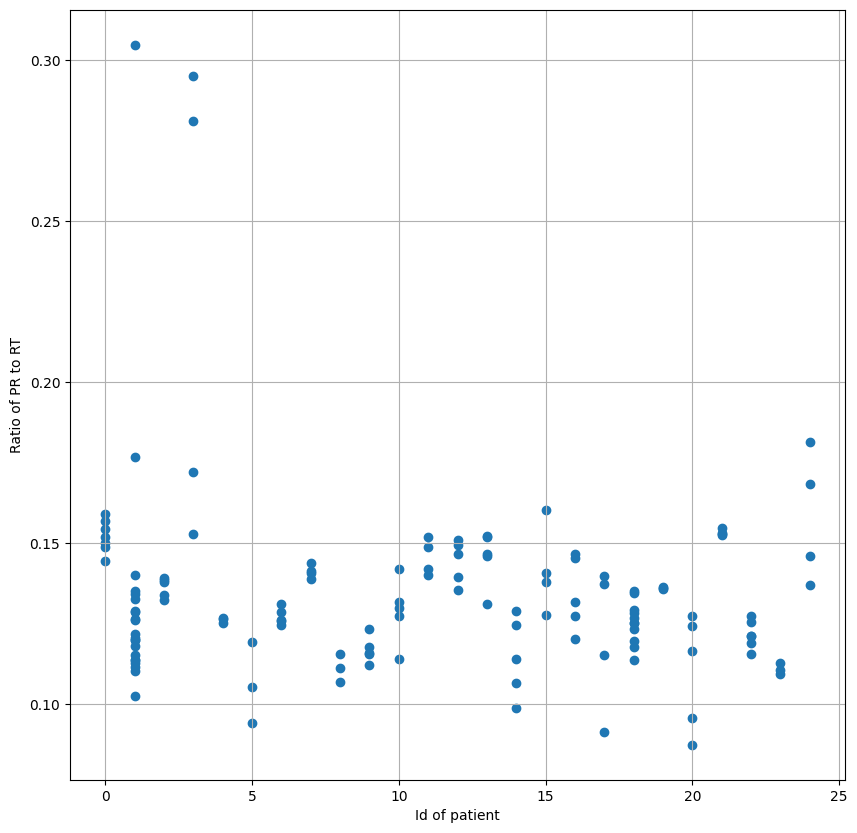

In [11]:

plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["PR/RT"])
plt.xlabel("Id of patient")
plt.ylabel("Ratio of PR to RT")
plt.grid()

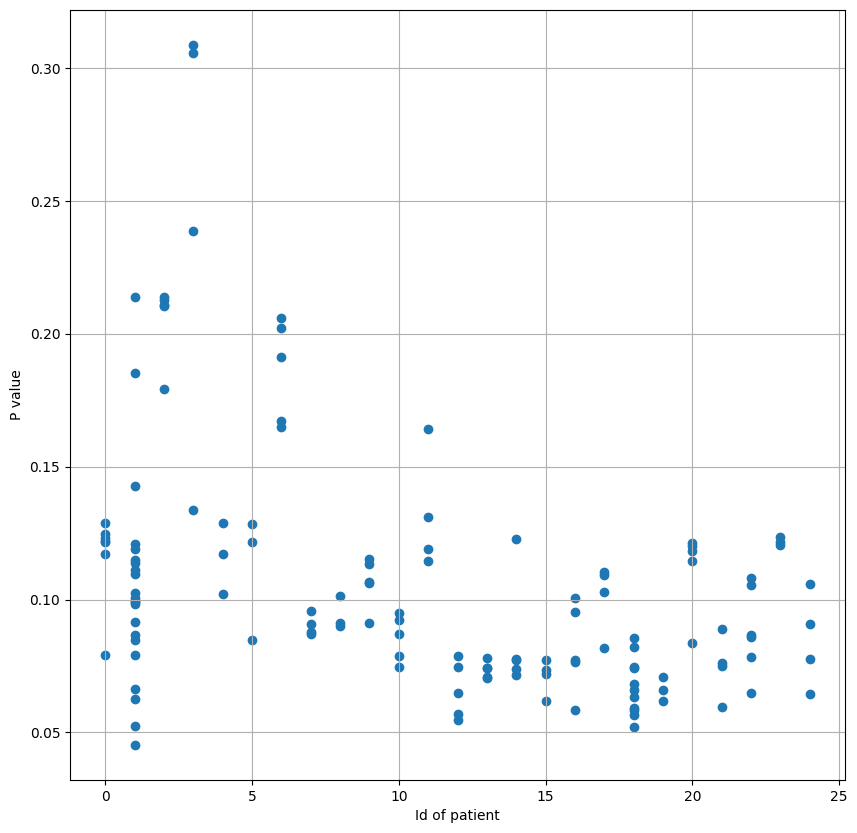

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["P"])
plt.xlabel("Id of patient")
plt.ylabel("P value")
plt.grid()

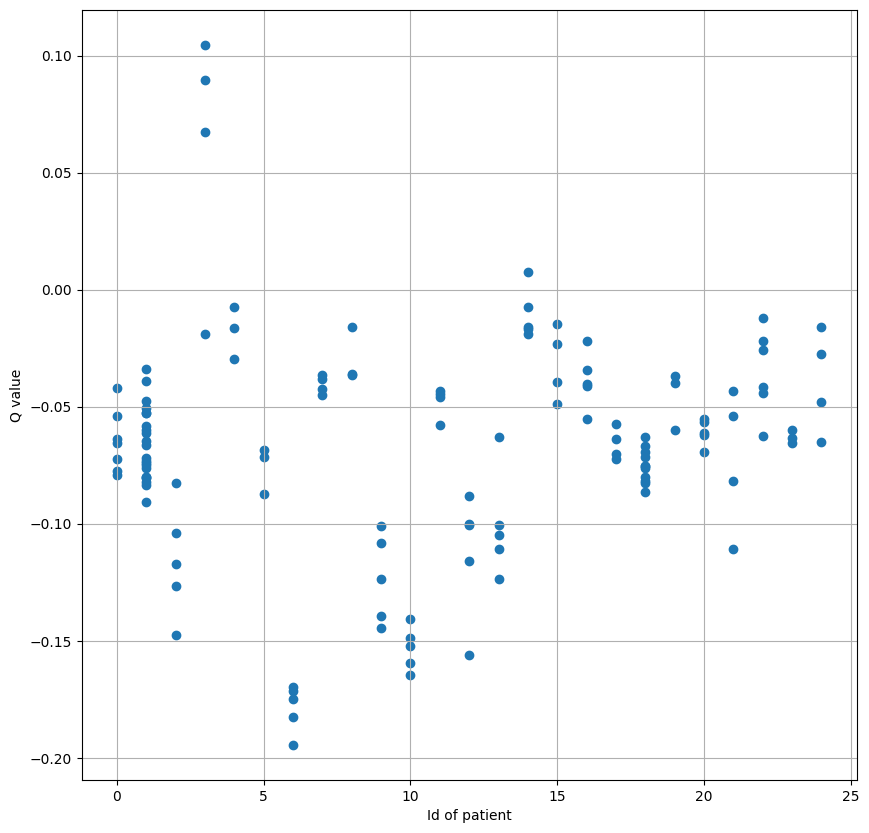

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["Q"])
plt.xlabel("Id of patient")
plt.ylabel("Q value")
plt.grid()

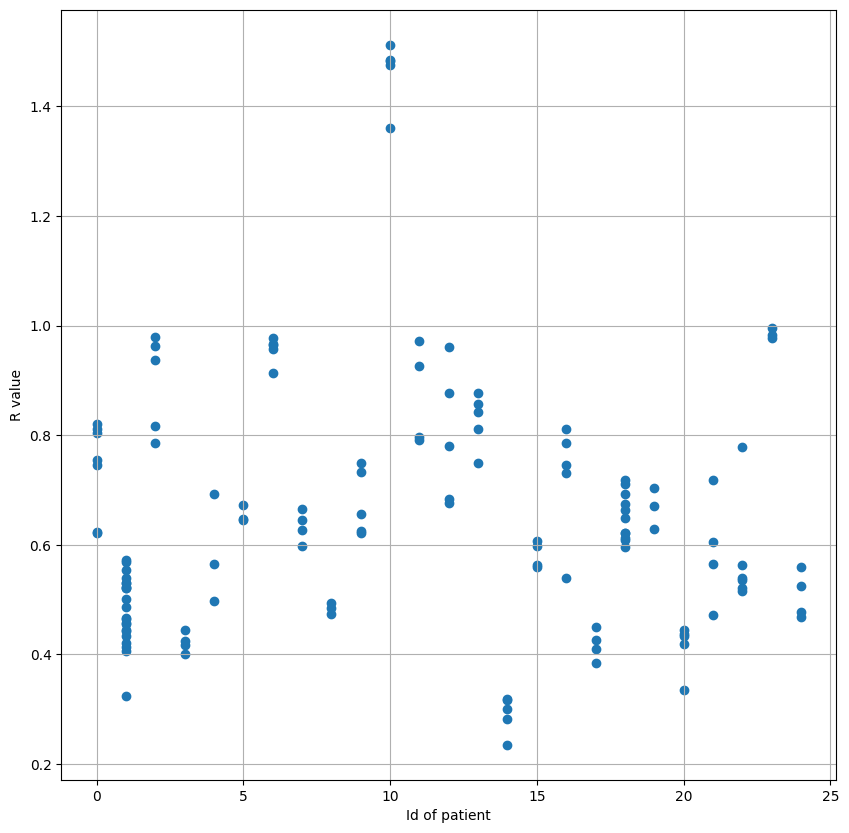

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["R"])
plt.xlabel("Id of patient")
plt.ylabel("R value")
plt.grid()

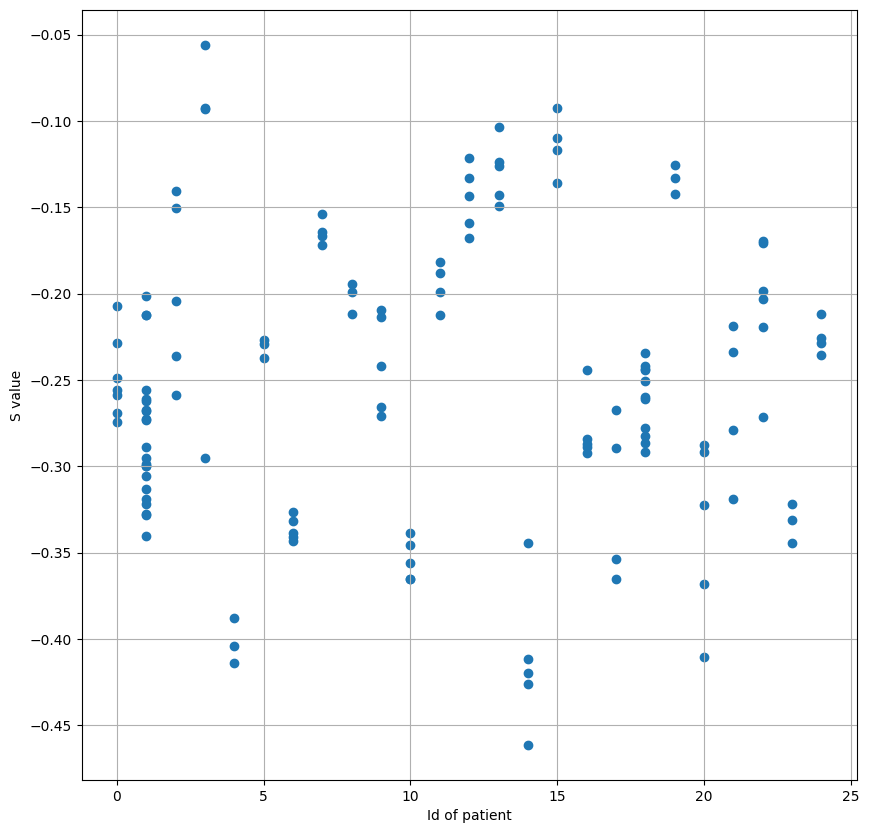

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["S"])
plt.xlabel("Id of patient")
plt.ylabel("S value")
plt.grid()

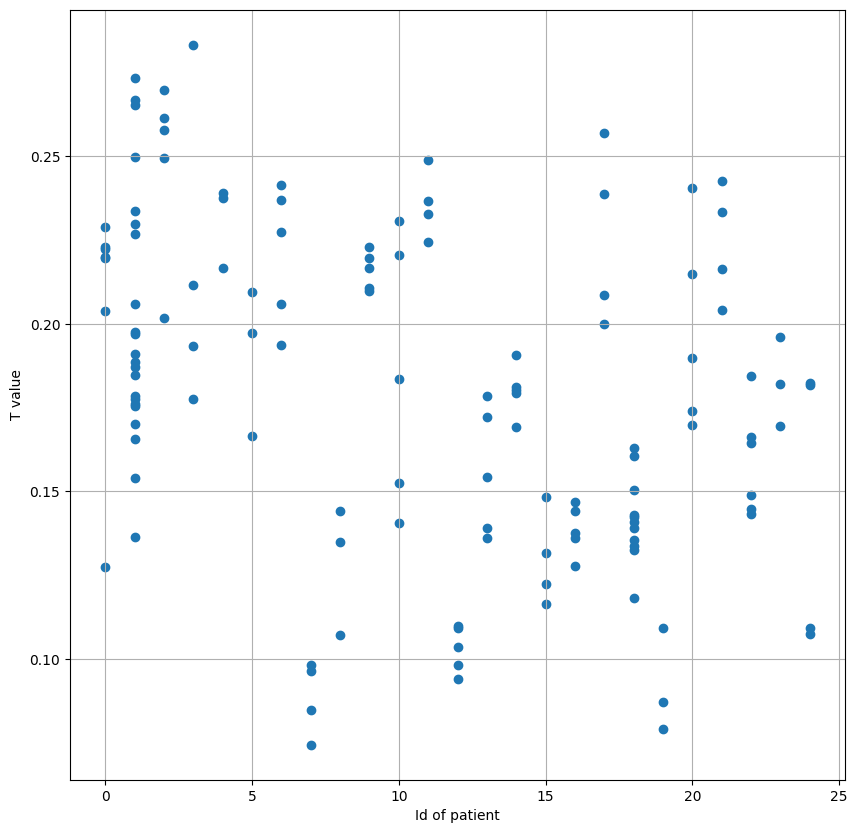

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["T"])
plt.xlabel("Id of patient")
plt.ylabel("T value")
plt.grid()

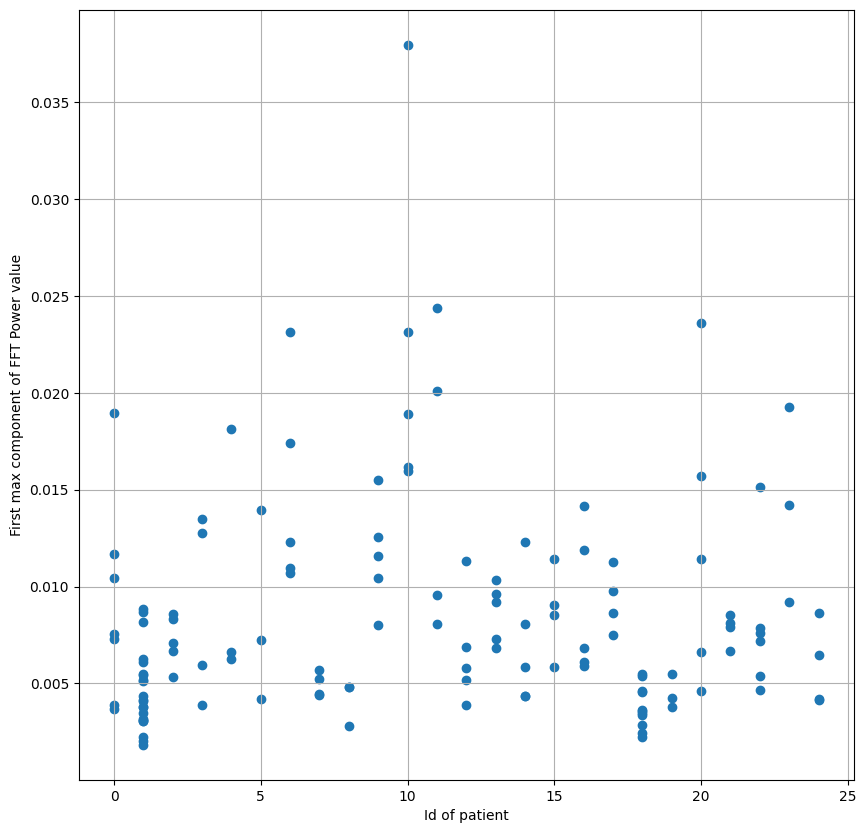

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["FFT_max_1_Pwr"])
plt.xlabel("Id of patient")
plt.ylabel("First max component of FFT Power value")
plt.grid()

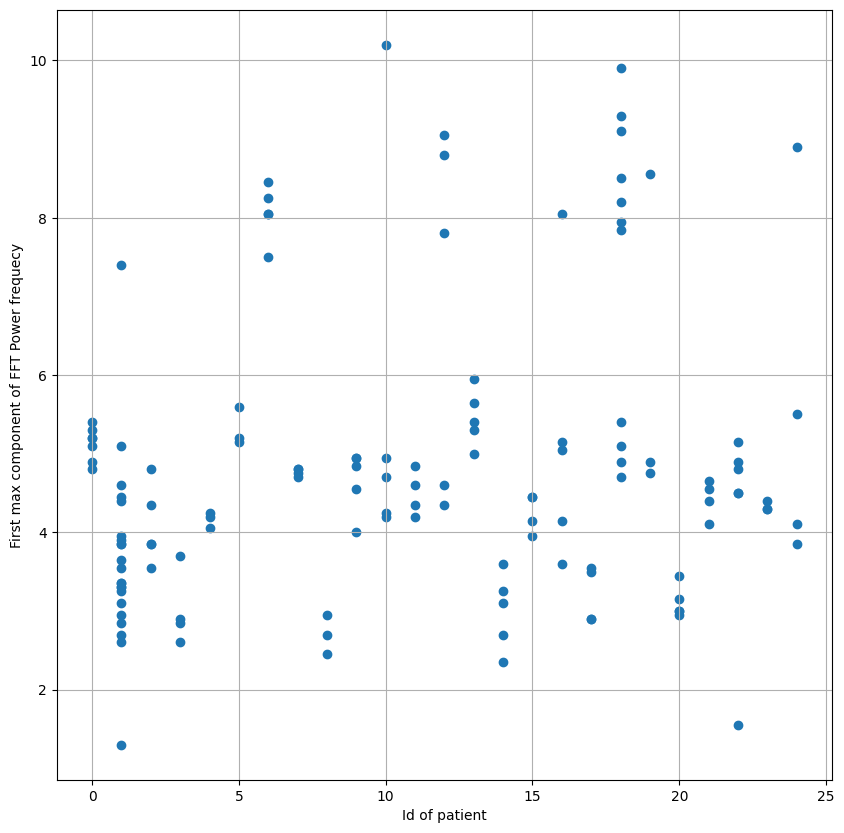

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["FFT_max_1_F"])
plt.xlabel("Id of patient")
plt.ylabel("First max component of FFT Power frequecy")
plt.grid()

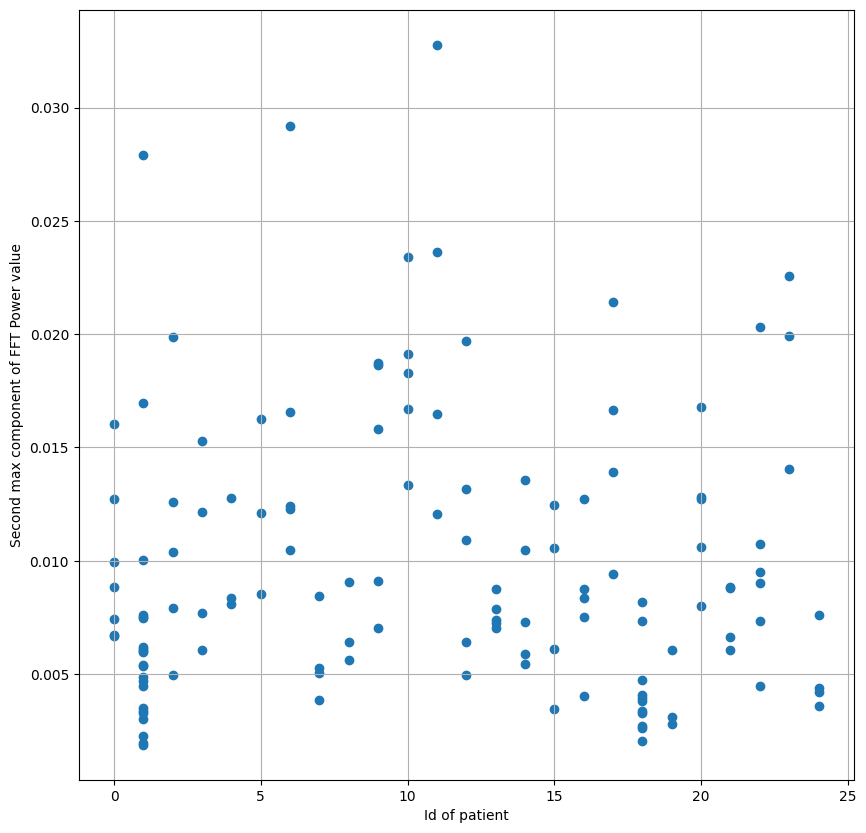

In [19]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["FFT_max_2_Pwr"])
plt.xlabel("Id of patient")
plt.ylabel("Second max component of FFT Power value")
plt.grid()

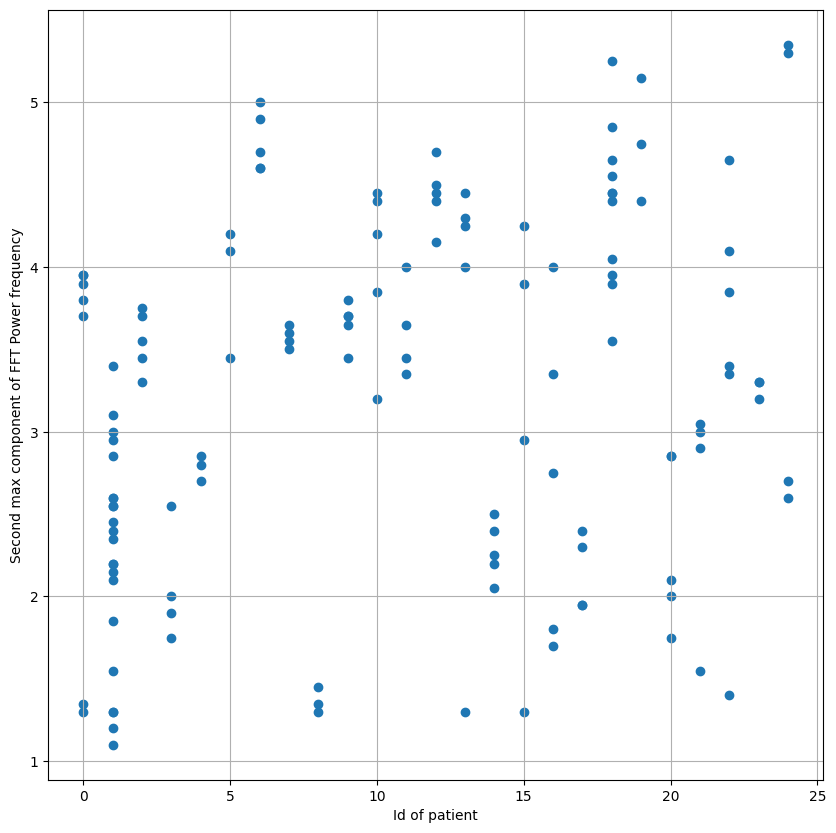

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["FFT_max_2_F"])
plt.xlabel("Id of patient")
plt.ylabel("Second max component of FFT Power frequency")
plt.grid()

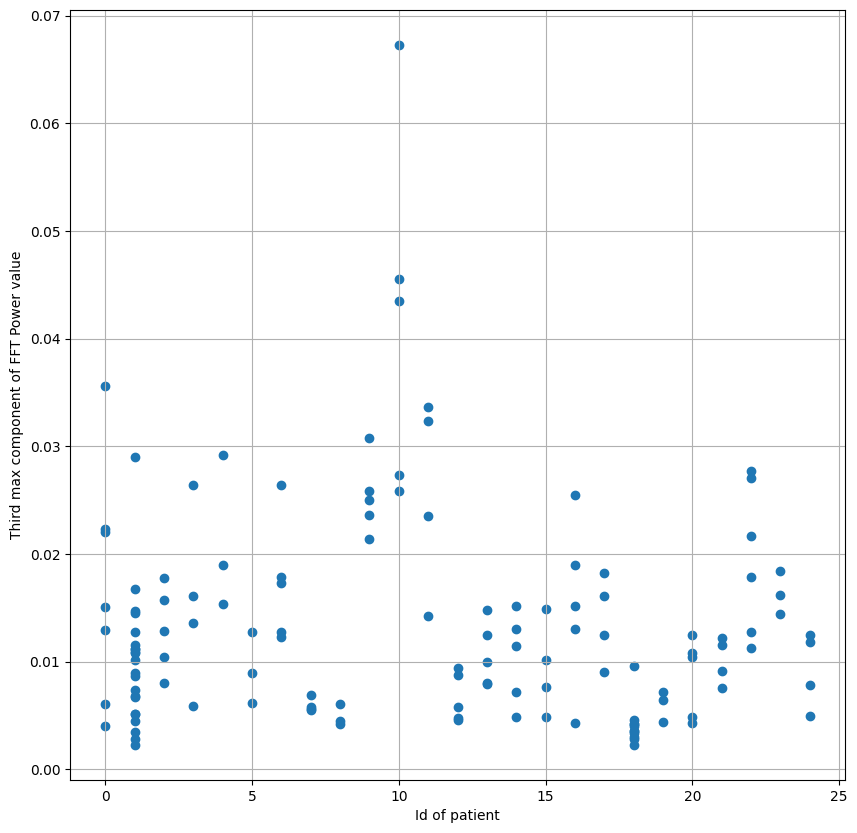

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["FFT_max_3_Pwr"])
plt.xlabel("Id of patient")
plt.ylabel("Third max component of FFT Power value")
plt.grid()

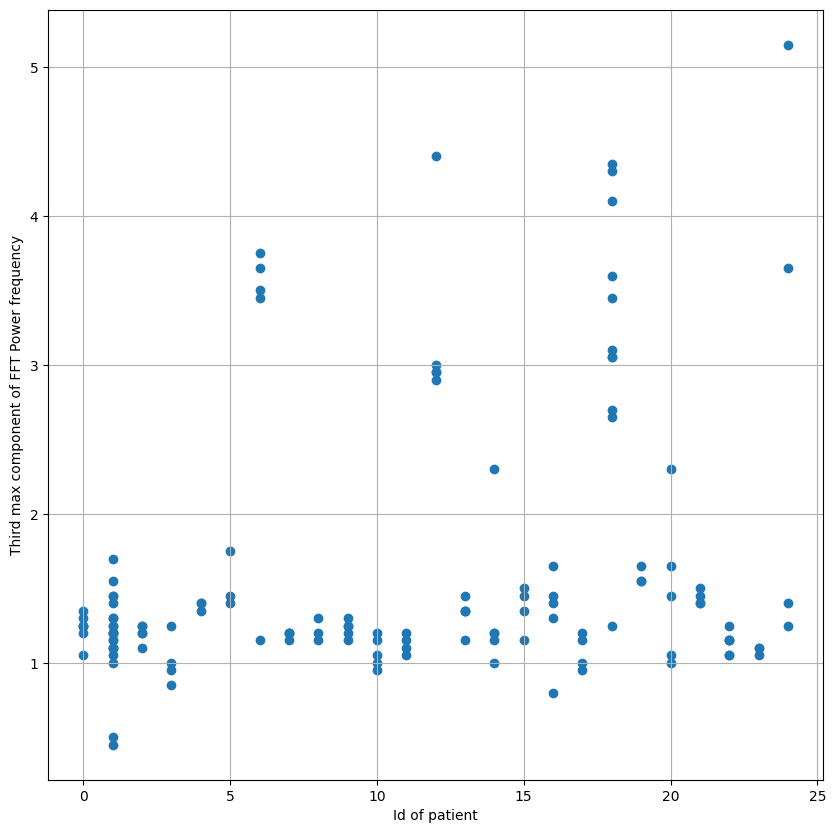

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(x = dt["Person"], y = dt["FFT_max_3_F"])
plt.xlabel("Id of patient")
plt.ylabel("Third max component of FFT Power frequency")
plt.grid()

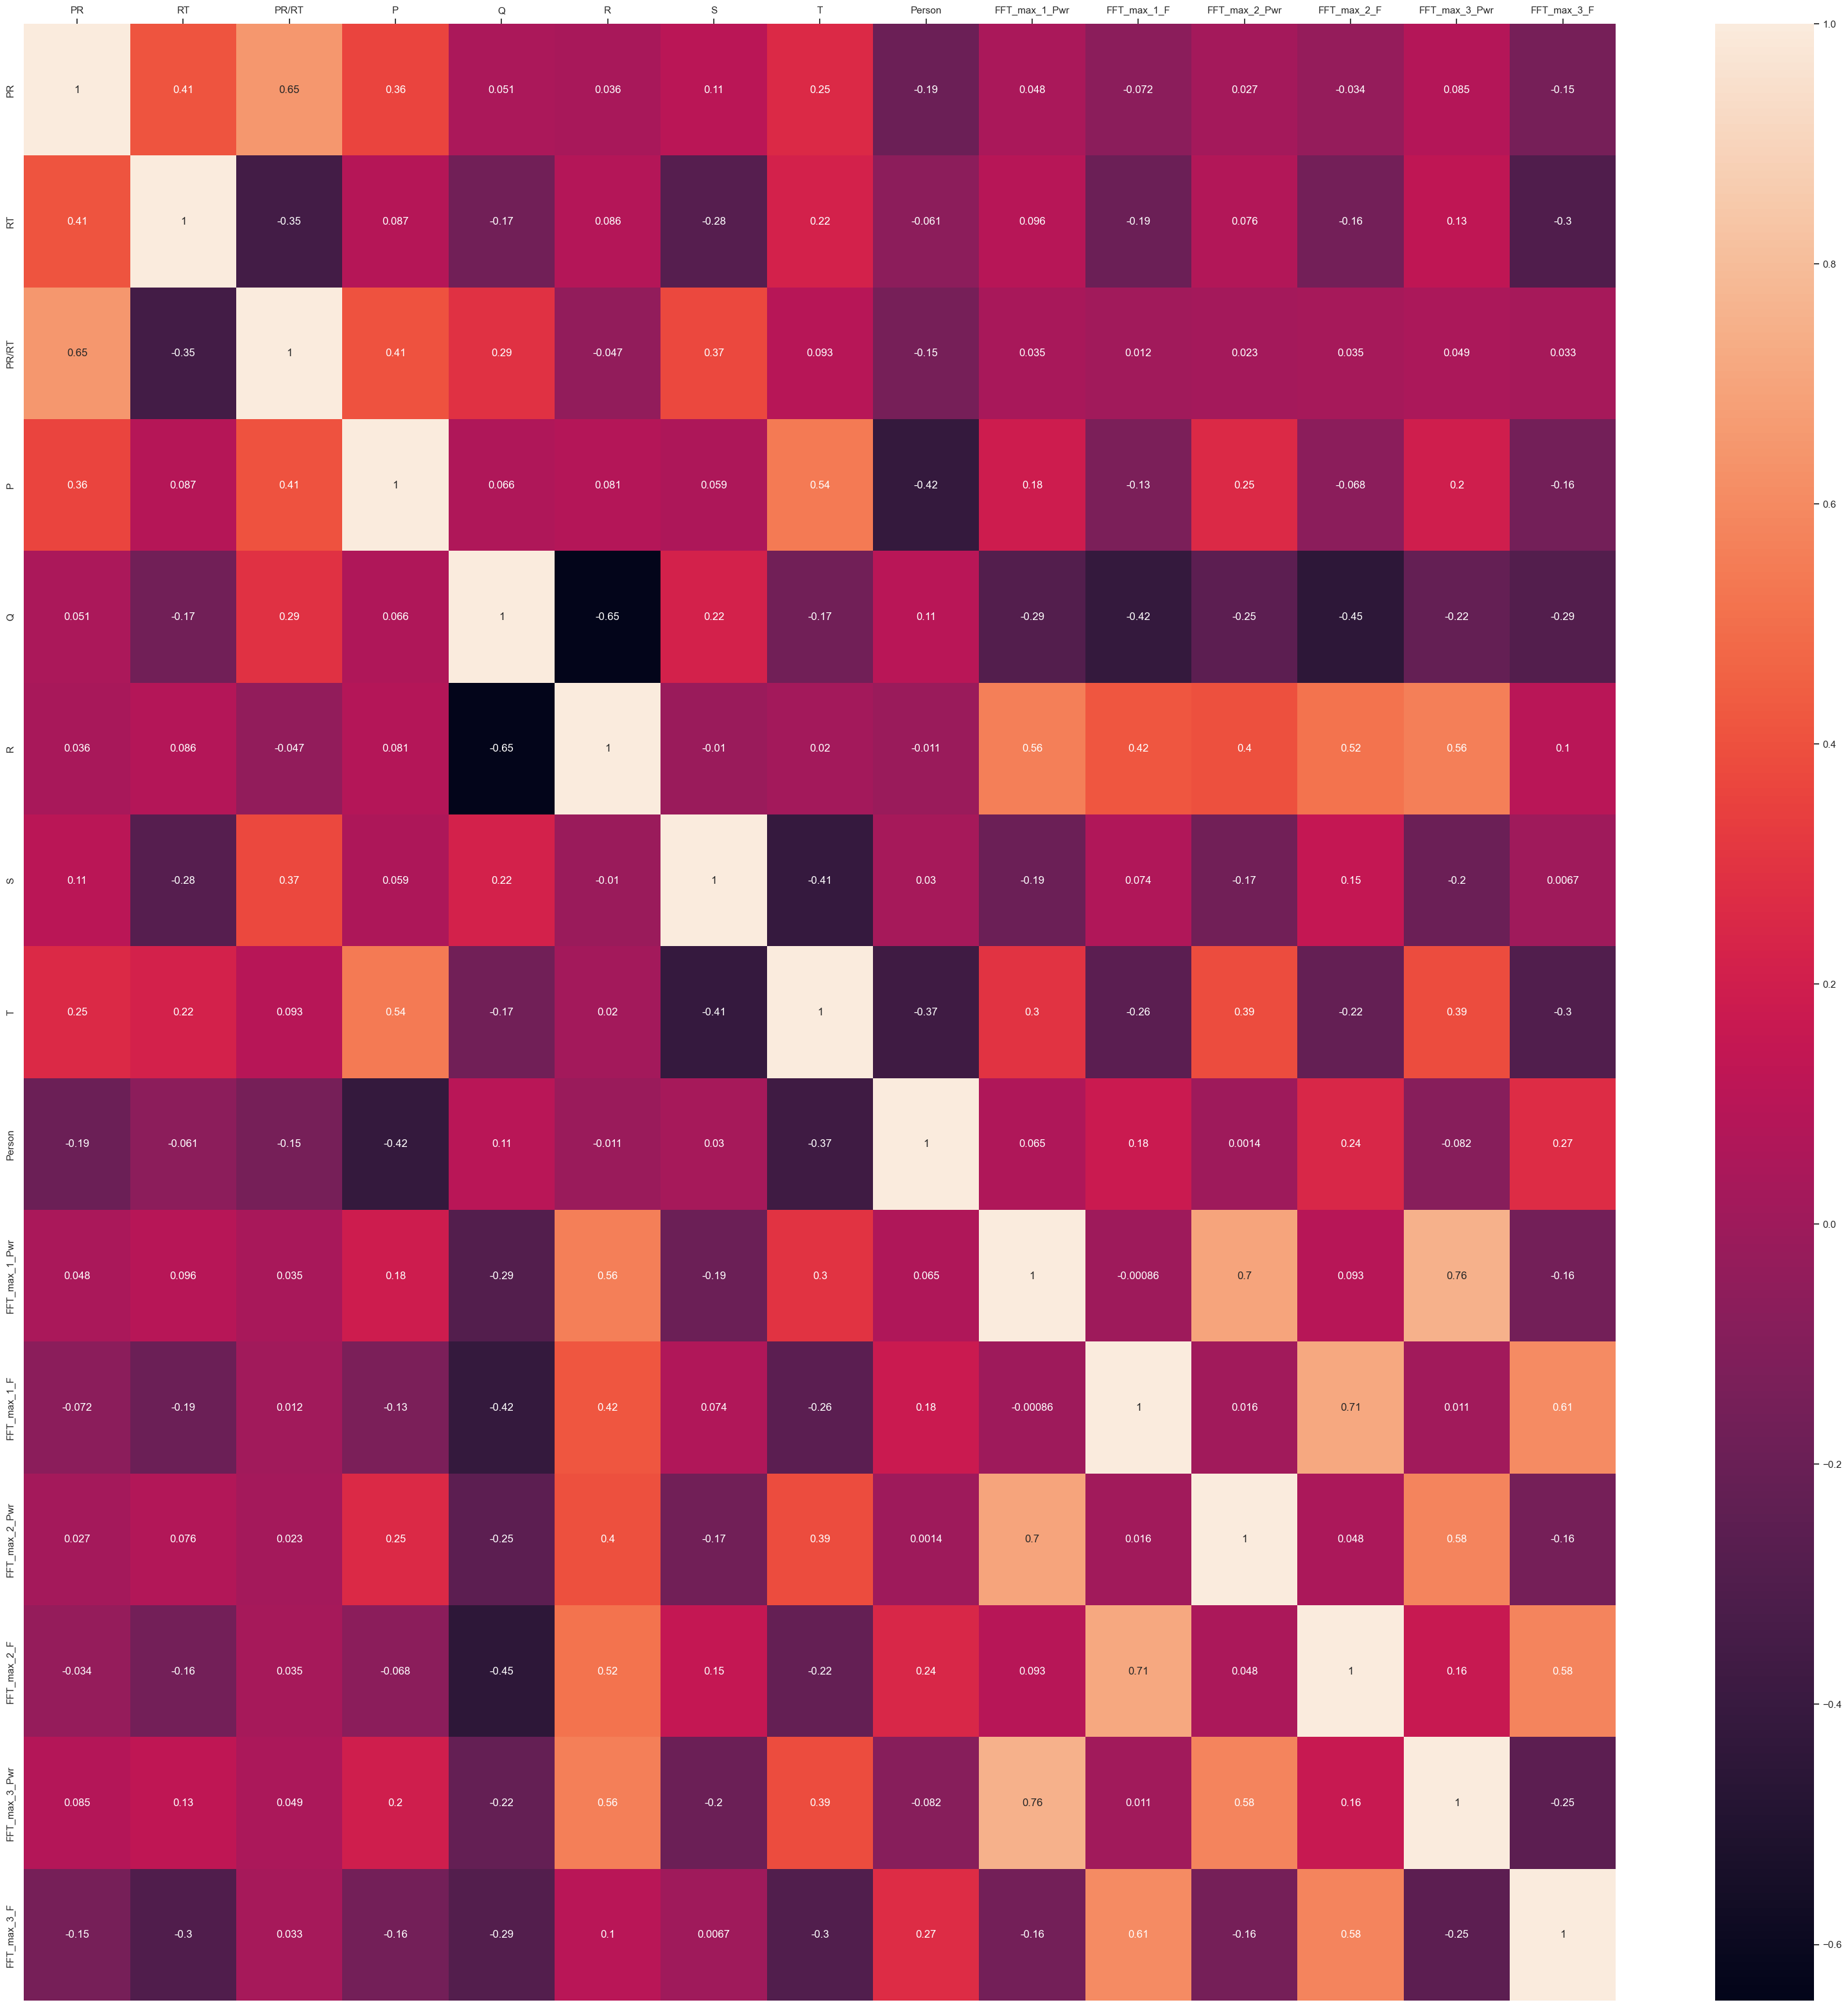

In [25]:
ax = sns.heatmap(dt.corr(), annot=True)
ax.set(xlabel="", ylabel="")
sns.set_theme(rc={'figure.figsize':(30, 30)})
ax.xaxis.tick_top()

In [9]:
X = dt.drop(["Person"], axis=1)
y = dt["Person"]

# Standarization 0-1 scale
X = (X-X.min())/(X.max()-X.min())

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)



In [10]:
X["R"].max()

1.0

In [11]:
# Augmentation

attrs_max = {}
attrs_min = {}

for attr in X_train_valid.columns:
    attrs_max[attr] = dt[attr].max()
    attrs_min[attr] = dt[attr].min()

dt_aug = pd.DataFrame(pd.concat([X_train_valid, y_train_valid], axis=1))

for i in range(len(dt_aug)):
    for j in range(5):
        dt_aug = pd.concat([dt_aug, pd.DataFrame({"PR": dt_aug.iloc[i]["PR"] + (randint(0, 2, 2) - 1) * abs(attrs_max["PR"] - attrs_min["PR"]) * random() * 0.01, # attribute +- attributes scale * random number * 0.01
                                                "RT": dt_aug.iloc[i]["RT"] + (randint(0, 2, 2) - 1) * abs(attrs_max["RT"] - attrs_min["RT"]) * random() * 0.01,
                                                "PR/RT": dt_aug.iloc[i]["PR/RT"] + (randint(0, 2, 2) - 1) * abs(attrs_max["PR/RT"] - attrs_min["PR/RT"]) * random() * 0.01,
                                                "P": dt_aug.iloc[i]["P"] + (randint(0, 2, 2) - 1) * abs(attrs_max["P"] - attrs_min["P"]) * random() * 10 * 0.01,
                                                "Q": dt_aug.iloc[i]["Q"] + (randint(0, 2, 2) - 1) * abs(attrs_max["Q"] - attrs_min["Q"]) * random() * 10 * 0.01,
                                                "R": dt_aug.iloc[i]["R"] + (randint(0, 2, 2) - 1) * abs(attrs_max["R"] - attrs_min["R"]) * random() * 10 * 0.01,
                                                "S": dt_aug.iloc[i]["S"] + (randint(0, 2, 2) - 1) * abs(attrs_max["S"] - attrs_min["S"]) * random() * 10 * 0.01,
                                                "T": dt_aug.iloc[i]["T"] + (randint(0, 2, 2) - 1) * abs(attrs_max["T"] - attrs_min["T"]) * random() * 10 * 0.01,
                                                "Person": int(dt_aug.iloc[i]["Person"]),
                                                "FFT_max_1_Pwr": dt_aug.iloc[i]["FFT_max_1_Pwr"] + (randint(0, 2, 2) - 1) * abs(attrs_max["FFT_max_1_Pwr"] - attrs_min["FFT_max_1_Pwr"]) * random() * 0.01,
                                                "FFT_max_1_F": dt_aug.iloc[i]["FFT_max_1_F"] + (randint(0, 2, 2) - 1) * abs(attrs_max["FFT_max_1_F"] - attrs_min["FFT_max_1_F"]) * random() * 0.01,
                                                "FFT_max_2_Pwr": dt_aug.iloc[i]["FFT_max_2_Pwr"] + (randint(0, 2, 2) - 1) * abs(attrs_max["FFT_max_2_Pwr"] - attrs_min["FFT_max_2_Pwr"]) * random() * 0.01,
                                                "FFT_max_2_F": dt_aug.iloc[i]["FFT_max_2_F"] + (randint(0, 2, 2) - 1) * abs(attrs_max["FFT_max_2_F"] - attrs_min["FFT_max_2_F"]) * random() * 0.01,
                                                "FFT_max_3_Pwr": dt_aug.iloc[i]["FFT_max_3_Pwr"] + (randint(0, 2, 2) - 1) * abs(attrs_max["FFT_max_3_Pwr"] - attrs_min["FFT_max_3_Pwr"]) * random() * 0.01,
                                                "FFT_max_3_F": dt_aug.iloc[i]["FFT_max_3_F"] + (randint(0, 2, 2) - 1) * abs(attrs_max["FFT_max_3_F"] - attrs_min["FFT_max_3_F"]) * random() * 0.01})], ignore_index=True)

dt_aug

,PR,RT,PR/RT,P,Q,R,S,T,FFT_max_1_Pwr,FFT_max_1_F,FFT_max_2_Pwr,FFT_max_2_F,FFT_max_3_Pwr,FFT_max_3_F,Person
0,0.145658,0.301533,0.285682,0.034919,0.355557,0.345297,0.838054,0.169175,0.140031,0.870787,0.576550,0.800000,0.109309,0.542553,12
1,0.095238,0.375639,0.140583,0.243796,0.381046,0.196285,0.330006,0.952568,0.117922,0.174157,0.137324,0.341176,0.136222,0.170213,1
2,0.095238,0.217206,0.267249,0.189820,0.465067,0.388779,0.416295,0.347175,0.118484,0.432584,0.222713,0.141176,0.031031,0.212766,16
3,0.156863,0.308348,0.299946,0.053755,0.504960,0.184877,0.561134,0.620525,0.173913,0.365169,0.225588,0.447059,0.152520,0.223404,21
4,0.151261,0.437819,0.190173,0.249422,0.405060,0.223228,0.410184,0.729483,0.174881,0.000000,0.182487,0.023529,0.043901,0.138298,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.154062,0.474446,0.170785,0.453616,0.082851,0.507376,0.291169,0.629409,0.289901,0.780899,0.336335,0.847059,0.160872,0.619335,6
1173,0.154062,0.474446,0.169273,0.448297,0.071867,0.489950,0.291169,0.620887,0.289901,0.780899,0.336253,0.847059,0.161432,0.601963,6
1174,-0.422204,0.022664,0.169273,0.448297,0.082851,0.489950,0.250807,0.629409,0.289901,0.780899,0.336335,0.816075,0.161065,0.648936,6
1175,0.154062,0.474446,0.171181,0.452395,0.082851,0.570921,0.256344,0.619270,0.289901,0.780899,0.336335,0.847059,0.161432,0.648936,6


In [12]:
X_train_valid = dt_aug.drop(["Person"], axis=1)
y_train_valid = dt_aug["Person"]

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,
                                                    y_train_valid,
                                                    test_size=0.20,
                                                    stratify=y_train_valid,
                                                    random_state=42)

In [13]:
y_train.value_counts()

Person
1     158
18     79
0      53
22     44
13     35
10     35
6      35
2      35
14     35
20     35
16     35
9      35
12     35
15     27
3      27
17     27
7      27
24     26
5      26
4      26
11     26
21     26
8      18
19     18
23     18
Name: count, dtype: int64

In [14]:
y_valid.value_counts()

Person
1     40
18    20
0     13
22    11
14     9
9      9
2      9
16     9
13     9
6      9
10     9
12     9
20     9
11     7
4      7
21     7
24     7
5      7
15     6
17     6
3      6
7      6
8      4
19     4
23     4
Name: count, dtype: int64

In [66]:
y_test.value_counts()

Person
1     4
18    2
17    1
7     1
23    1
2     1
20    1
9     1
15    1
22    1
19    1
0     1
24    1
12    1
13    1
14    1
21    1
6     1
11    1
3     1
8     1
16    1
10    1
Name: count, dtype: int64

In [15]:
# Model referencyjny - sięć głęboka złożona z samych warstw gęstych Fully Connected

# dostosowanie danych wejściowych pod model referencyjny

inputs = keras.Input(shape=(14,))

x = layers.Dense(512, activation="relu")(inputs)
x = keras.layers.Dropout(rate=0.50)(x)

x = layers.Dense(1024, activation="relu")(x)
x = keras.layers.Dropout(rate=0.50)(x)

x = layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(rate=0.50)(x)

outputs = layers.Dense(25, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="ecg_classification.keras",
        save_best_only=True,
        monitor="val_loss"),
        keras.callbacks.EarlyStopping(
        restore_best_weights=True,
        monitor='loss',
        patience=5)
]
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=100,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks)

#Evaluating the model on the test set


test_model = keras.models.load_model("ecg_classification.keras")
test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.1075 - loss: 3.1644 - val_accuracy: 0.2119 - val_loss: 2.9940
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1933 - loss: 2.9810 - val_accuracy: 0.2585 - val_loss: 2.7955
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2294 - loss: 2.8158 - val_accuracy: 0.2627 - val_loss: 2.5165
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2692 - loss: 2.5380 - val_accuracy: 0.3390 - val_loss: 2.3187
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3023 - loss: 2.3783 - val_accuracy: 0.3602 - val_loss: 2.0348
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3672 - loss: 2.1346 - val_accuracy: 0.4407 - val_loss: 1.7632
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4063 - loss: 1.9409 - val_accuracy: 0.4661 - val_loss: 1.6547
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4069 - loss: 1.8493 - val_accuracy: 0.

In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,141,236 (8.17 MB)

 Trainable params: 1,070,617 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,070,619 (4.08 MB)

In [17]:
# Test data prediction
y_pred = test_model.predict(X_test)
for i in range(len(X_test)):
    print(f"Prediction is: {np.argmax(y_pred[i])}, Right answer is: {y_test.iloc[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediction is: 17, Right answer is: 17
Prediction is: 12, Right answer is: 12
Prediction is: 16, Right answer is: 16
Prediction is: 8, Right answer is: 8
Prediction is: 3, Right answer is: 3
Prediction is: 11, Right answer is: 11
Prediction is: 6, Right answer is: 6
Prediction is: 21, Right answer is: 21
Prediction is: 21, Right answer is: 1
Prediction is: 14, Right answer is: 14
Prediction is: 13, Right answer is: 13
Prediction is: 24, Right answer is: 24
Prediction is: 7, Right answer is: 7
Prediction is: 0, Right answer is: 0
Prediction is: 19, Right answer is: 19
Prediction is: 18, Right answer is: 18
Prediction is: 18, Right answer is: 18
Prediction is: 1, Right answer is: 1
Prediction is: 1, Right answer is: 1
Prediction is: 22, Right answer is: 22
Prediction is: 15, Right answer is: 15
Prediction is: 9, Right answer is: 9
Prediction is: 3, Right answer is: 1
Prediction is: 20, Right answer is: 20
Prediction is: 2, Right answer is: 2
Predicti

In [41]:
%pip install nbformat
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='RdBu'
    )
])
fig.show()

  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


    matplotlib (>=3.1numpy>=1.16)
               ~~~~~~^
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

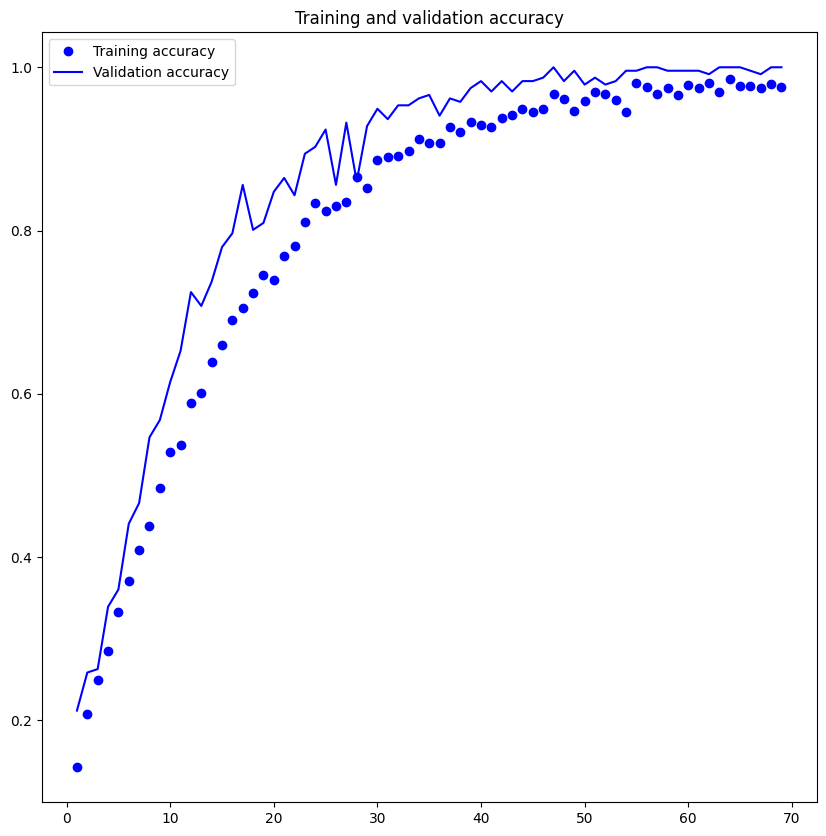

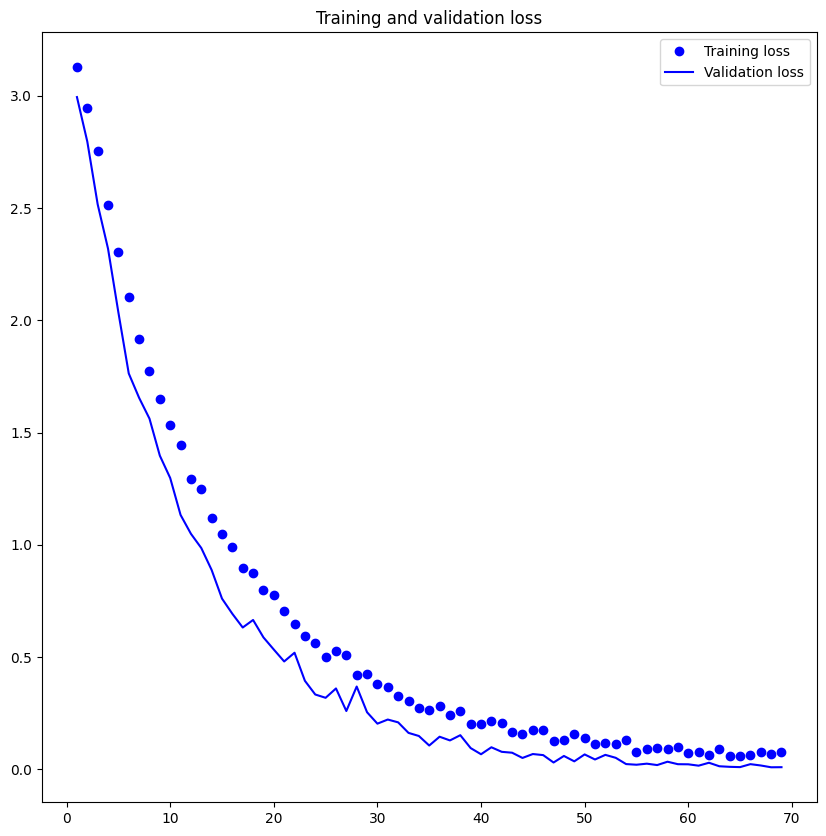

In [18]:
# Wykres diagnostyczny dla modelu referyncyjnego


import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(10, 10))
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

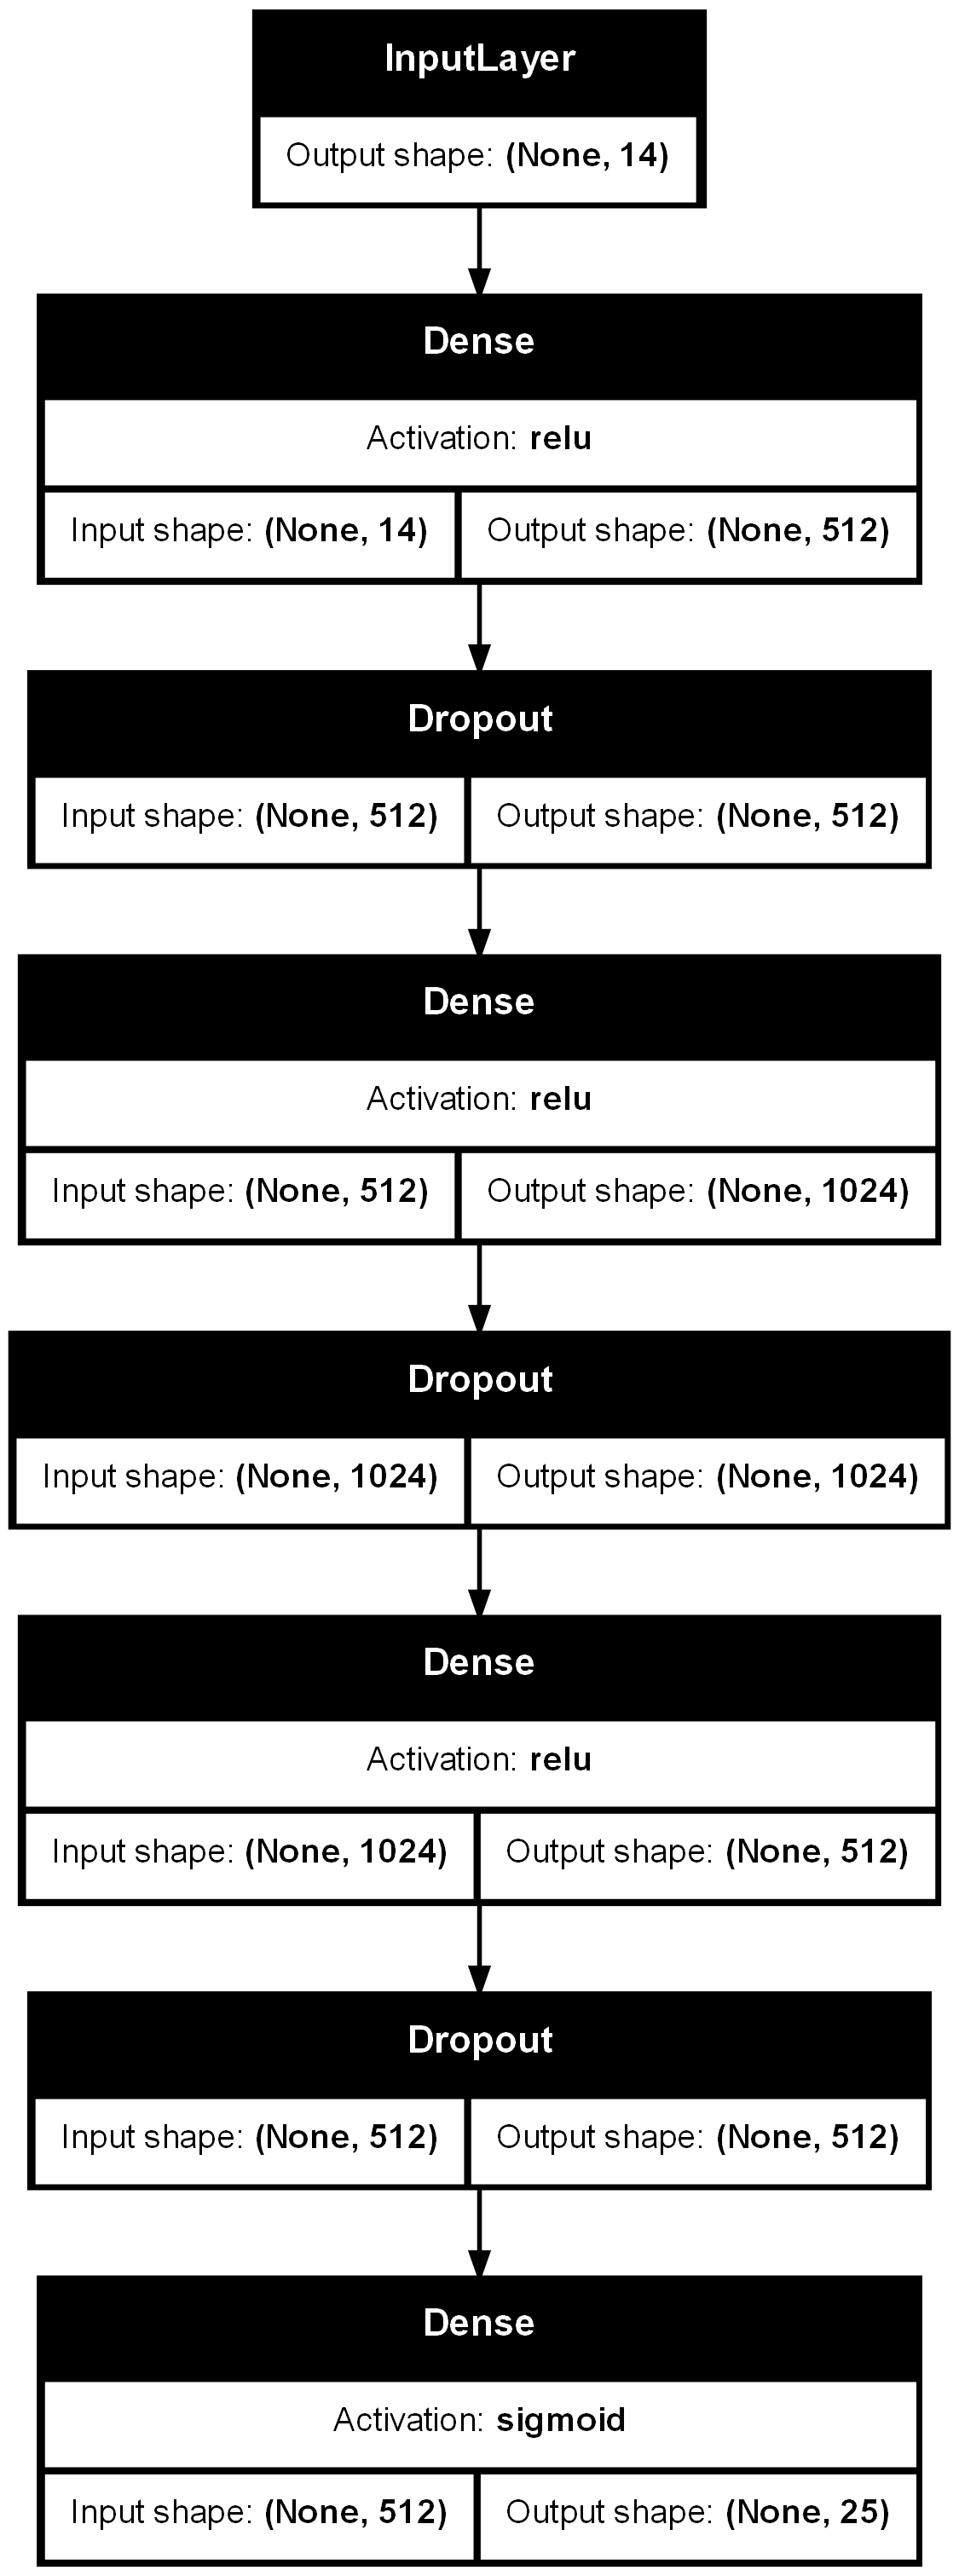

In [19]:
dot_img_file = 'model_1.png'
keras.utils.plot_model(model,
                       to_file=dot_img_file,
                       show_shapes=True,
                       show_layer_activations=True,
                       expand_nested=True)

In [ ]:
#Visualization data set
vis_X = pd.DataFrame({col: np.linspace(dt[col].min(), dt[col].max(), num=100) for col in list(X.columns.values)})
vis_X_mean = pd.DataFrame({col: np.linspace(X[col].mean(), X[col].mean(), num=100) for col in list(X.columns.values)})

# Standarization 0-1 scale
vis_X = (vis_X - vis_X.min()) / (vis_X.max() - vis_X.min())

316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


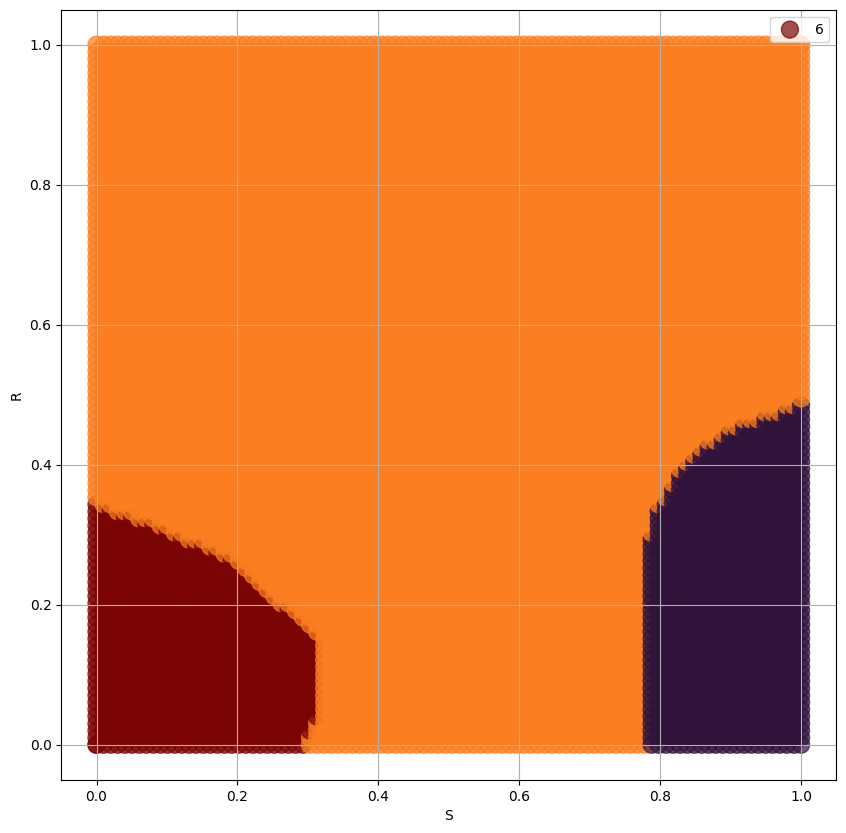

In [ ]:
cols = list(X.columns.values)
features = ["S", "R"]
for feature in features:
    cols.remove(feature)

vis_ftrs_attrs = pd.concat([vis_X[features[0]], vis_X[features[1]], vis_X_mean[cols]], axis=1)

ftr_0 = vis_ftrs_attrs[features[0]]
ftr_1 = vis_ftrs_attrs[features[1]]

for i in ftr_0:
    for j in ftr_1:
        vis_ftrs_attrs = pd.concat([vis_ftrs_attrs,
                                    pd.DataFrame([{**{features[0]: i, features[1]: j},
                                                   **{col: val for col, val in zip(vis_ftrs_attrs[cols].iloc[0].index,
                                                                                     vis_ftrs_attrs[cols].iloc[0].values)}}])], ignore_index=True)

# Prediction for two changing features
vis_P_R_attrs_y_pred_arr = test_model.predict(vis_ftrs_attrs)
vis_P_R_attrs_y_pred = [np.argmax(vis_P_R_attrs_y_pred_arr[i]) for i in range(len(vis_P_R_attrs_y_pred_arr))]

plt.figure(figsize=(10, 10))
plt.scatter(x=vis_ftrs_attrs[features[0]], y=vis_ftrs_attrs[features[1]], cmap="turbo", c=vis_P_R_attrs_y_pred, s=150, alpha=0.7) #, vmin=0, vmax=25)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(vis_P_R_attrs_y_pred)
plt.grid()

316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


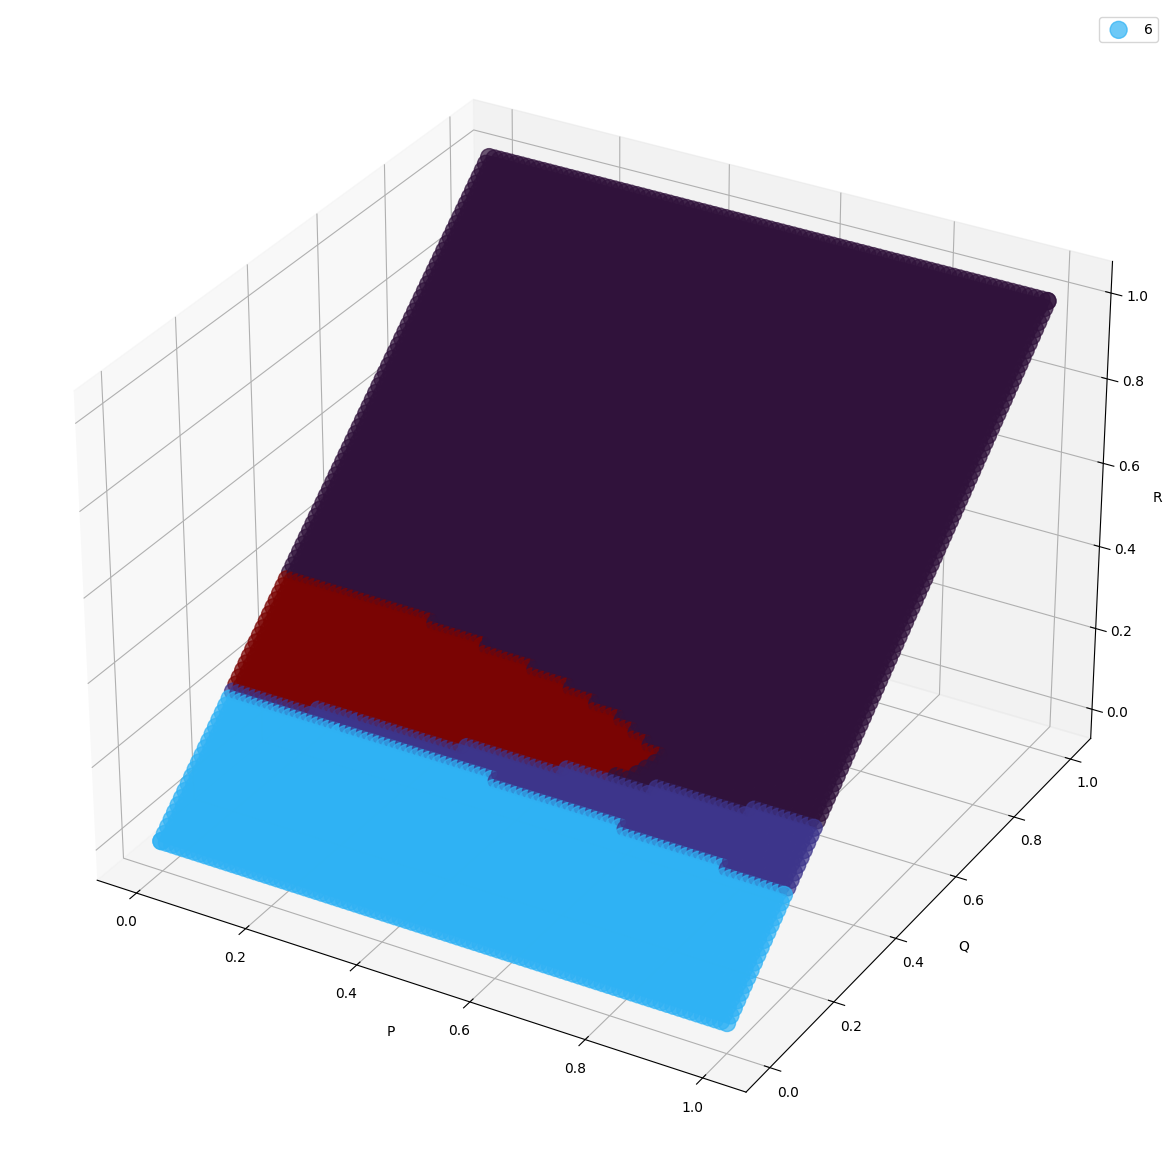

In [64]:
cols = list(X.columns.values)
features = ["P", "Q", "R"]
for feature in features:
    cols.remove(feature)
vis_ftrs_attrs = pd.concat([vis_X[features[0]], vis_X[features[1]], vis_X[features[2]], vis_X_mean[cols]], axis=1)

ftr_0 = vis_ftrs_attrs[features[0]]
ftr_1 = vis_ftrs_attrs[features[1]]
ftr_2 = vis_ftrs_attrs[features[2]]

for i in ftr_0:
    for j, k in zip(ftr_1, ftr_2):
            vis_ftrs_attrs = pd.concat([vis_ftrs_attrs, pd.DataFrame([{**{features[0]: i, features[1]: j, features[2]: k}, **{col: val for col, val in zip(vis_ftrs_attrs[cols].iloc[0].index, vis_ftrs_attrs[cols].iloc[0].values)}}])], ignore_index=True)


# Prediction for two changing features
vis_ftrs_attrs_y_pred_arr = test_model.predict(vis_ftrs_attrs)
vis_ftrs_attrs_y_pred = [np.argmax(vis_ftrs_attrs_y_pred_arr[i]) for i in range(len(vis_ftrs_attrs_y_pred_arr))]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs = vis_ftrs_attrs[features[0]], ys = vis_ftrs_attrs[features[1]], zs = vis_ftrs_attrs[features[2]], cmap="turbo", c=vis_ftrs_attrs_y_pred, s=150, alpha=0.7) #, vmin=0, vmax=25)
# ax.scatter(xs = X[features[0]], ys = X[features[1]], zs = X[features[2]], cmap="turbo", c=dt["Person"], s=150, alpha=0.7)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.legend(vis_P_R_attrs_y_pred)
ax.grid()

In [80]:
dt["P"].max()

0.308691345132367

In [19]:
def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.Dense(
      hp.Choice('units', [32, 64, 128, 256, 512, 1024]),
      activation='relu'))
  if hp.Boolean("dropout"):
        model.add(layers.Dropout(
             hp.Choice('rate', [0.25, 0.50, 0.75])))

  model.add(keras.layers.Dense(
      hp.Choice('units', [32, 64, 128, 256, 512, 1024]),
      activation='relu'))
  if hp.Boolean("dropout"):
        model.add(layers.Dropout(
             hp.Choice('rate', [0.25, 0.50, 0.75])))

  model.add(keras.layers.Dense(
      hp.Choice('units', [32, 64, 128, 256, 512, 1024]),
      activation='relu'))
  if hp.Boolean("dropout"):
        model.add(layers.Dropout(
             hp.Choice('rate', [0.25, 0.50, 0.75])))

  model.add(keras.layers.Dense(25, activation="softmax"))

  model.compile(optimizer="rmsprop", loss='sparse_categorical_crossentropy', metrics=["accuracy"])
  return model

In [36]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    overwrite = True)

In [37]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128, 256, 512, 1024], 'ordered': True}
dropout (Boolean)
{'default': False, 'conditions': []}


In [38]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),  batch_size=100)
best_model = tuner.get_best_models()[0]

Trial 20 Complete [00h 00m 12s]
val_loss: 1.896120309829712

Best val_loss So Far: 0.00154181441757828
Total elapsed time: 00h 06m 44s


c:\Users\sebex\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [39]:
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 14,))
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        15,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │        25,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,140,185 (8.16 MB)

 Trainable params: 2,140,185 (8.16 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 03 summary
Hyperparameters:
units: 1024
dropout: True
rate: 0.5
Score: 0.00154181441757828

Trial 18 summary
Hyperparameters:
units: 512
dropout: True
rate: 0.25
Score: 0.0015681488439440727

Trial 15 summary
Hyperparameters:
units: 1024
dropout: False
rate: 0.75
Score: 0.003520372323691845

Trial 13 summary
Hyperparameters:
units: 256
dropout: True
rate: 0.25
Score: 0.004279108252376318

Trial 16 summary
Hyperparameters:
units: 512
dropout: False
rate: 0.5
Score: 0.007232145871967077

Trial 00 summary
Hyperparameters:
units: 256
dropout: False
Score: 0.012545411475002766

Trial 11 summary
Hyperparameters:
units: 128
dropout: False
rate: 0.75
Score: 0.029336491599678993

Trial 17 summary
Hyperparameters:
units: 128
dropout: True
rate: 0.25
Score: 0.03382951393723488

Trial 07 summary
Hyperparameters:
units: 1024
dropout: True
rate: 0.75
Score: 0.03548003360629082

Tri

In [41]:
# Get the best hyperparameters.
best_hps = tuner.get_best_hyperparameters()
# Build the model with the best hp.
tuned_model = build_model(best_hps[0])
# Fit with the entire dataset.

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="ecg_classification_best_tuned.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        restore_best_weights=True,
        monitor='loss',
        patience=5)]

history = tuned_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=100,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks)

#Evaluating the model on the test set

test_tuned_model = keras.models.load_model("ecg_classification_best_tuned.keras")
test_loss, test_acc = test_tuned_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.1272 - loss: 3.1555 - val_accuracy: 0.1822 - val_loss: 3.0101
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1943 - loss: 2.9720 - val_accuracy: 0.2500 - val_loss: 2.7199
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2781 - loss: 2.6585 - val_accuracy: 0.3136 - val_loss: 2.4839
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2842 - loss: 2.4834 - val_accuracy: 0.3729 - val_loss: 2.0815
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3593 - loss: 2.1719 - val_accuracy: 0.4153 - val_loss: 1.8784
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3564 - loss: 2.0406 - val_accuracy: 0.5085 - val_loss: 1.5793
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4405 - loss: 1.7377 - val_accuracy: 0.4831 - val_loss: 1.5887
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4847 - loss: 1.6637 - val_accuracy: 0.

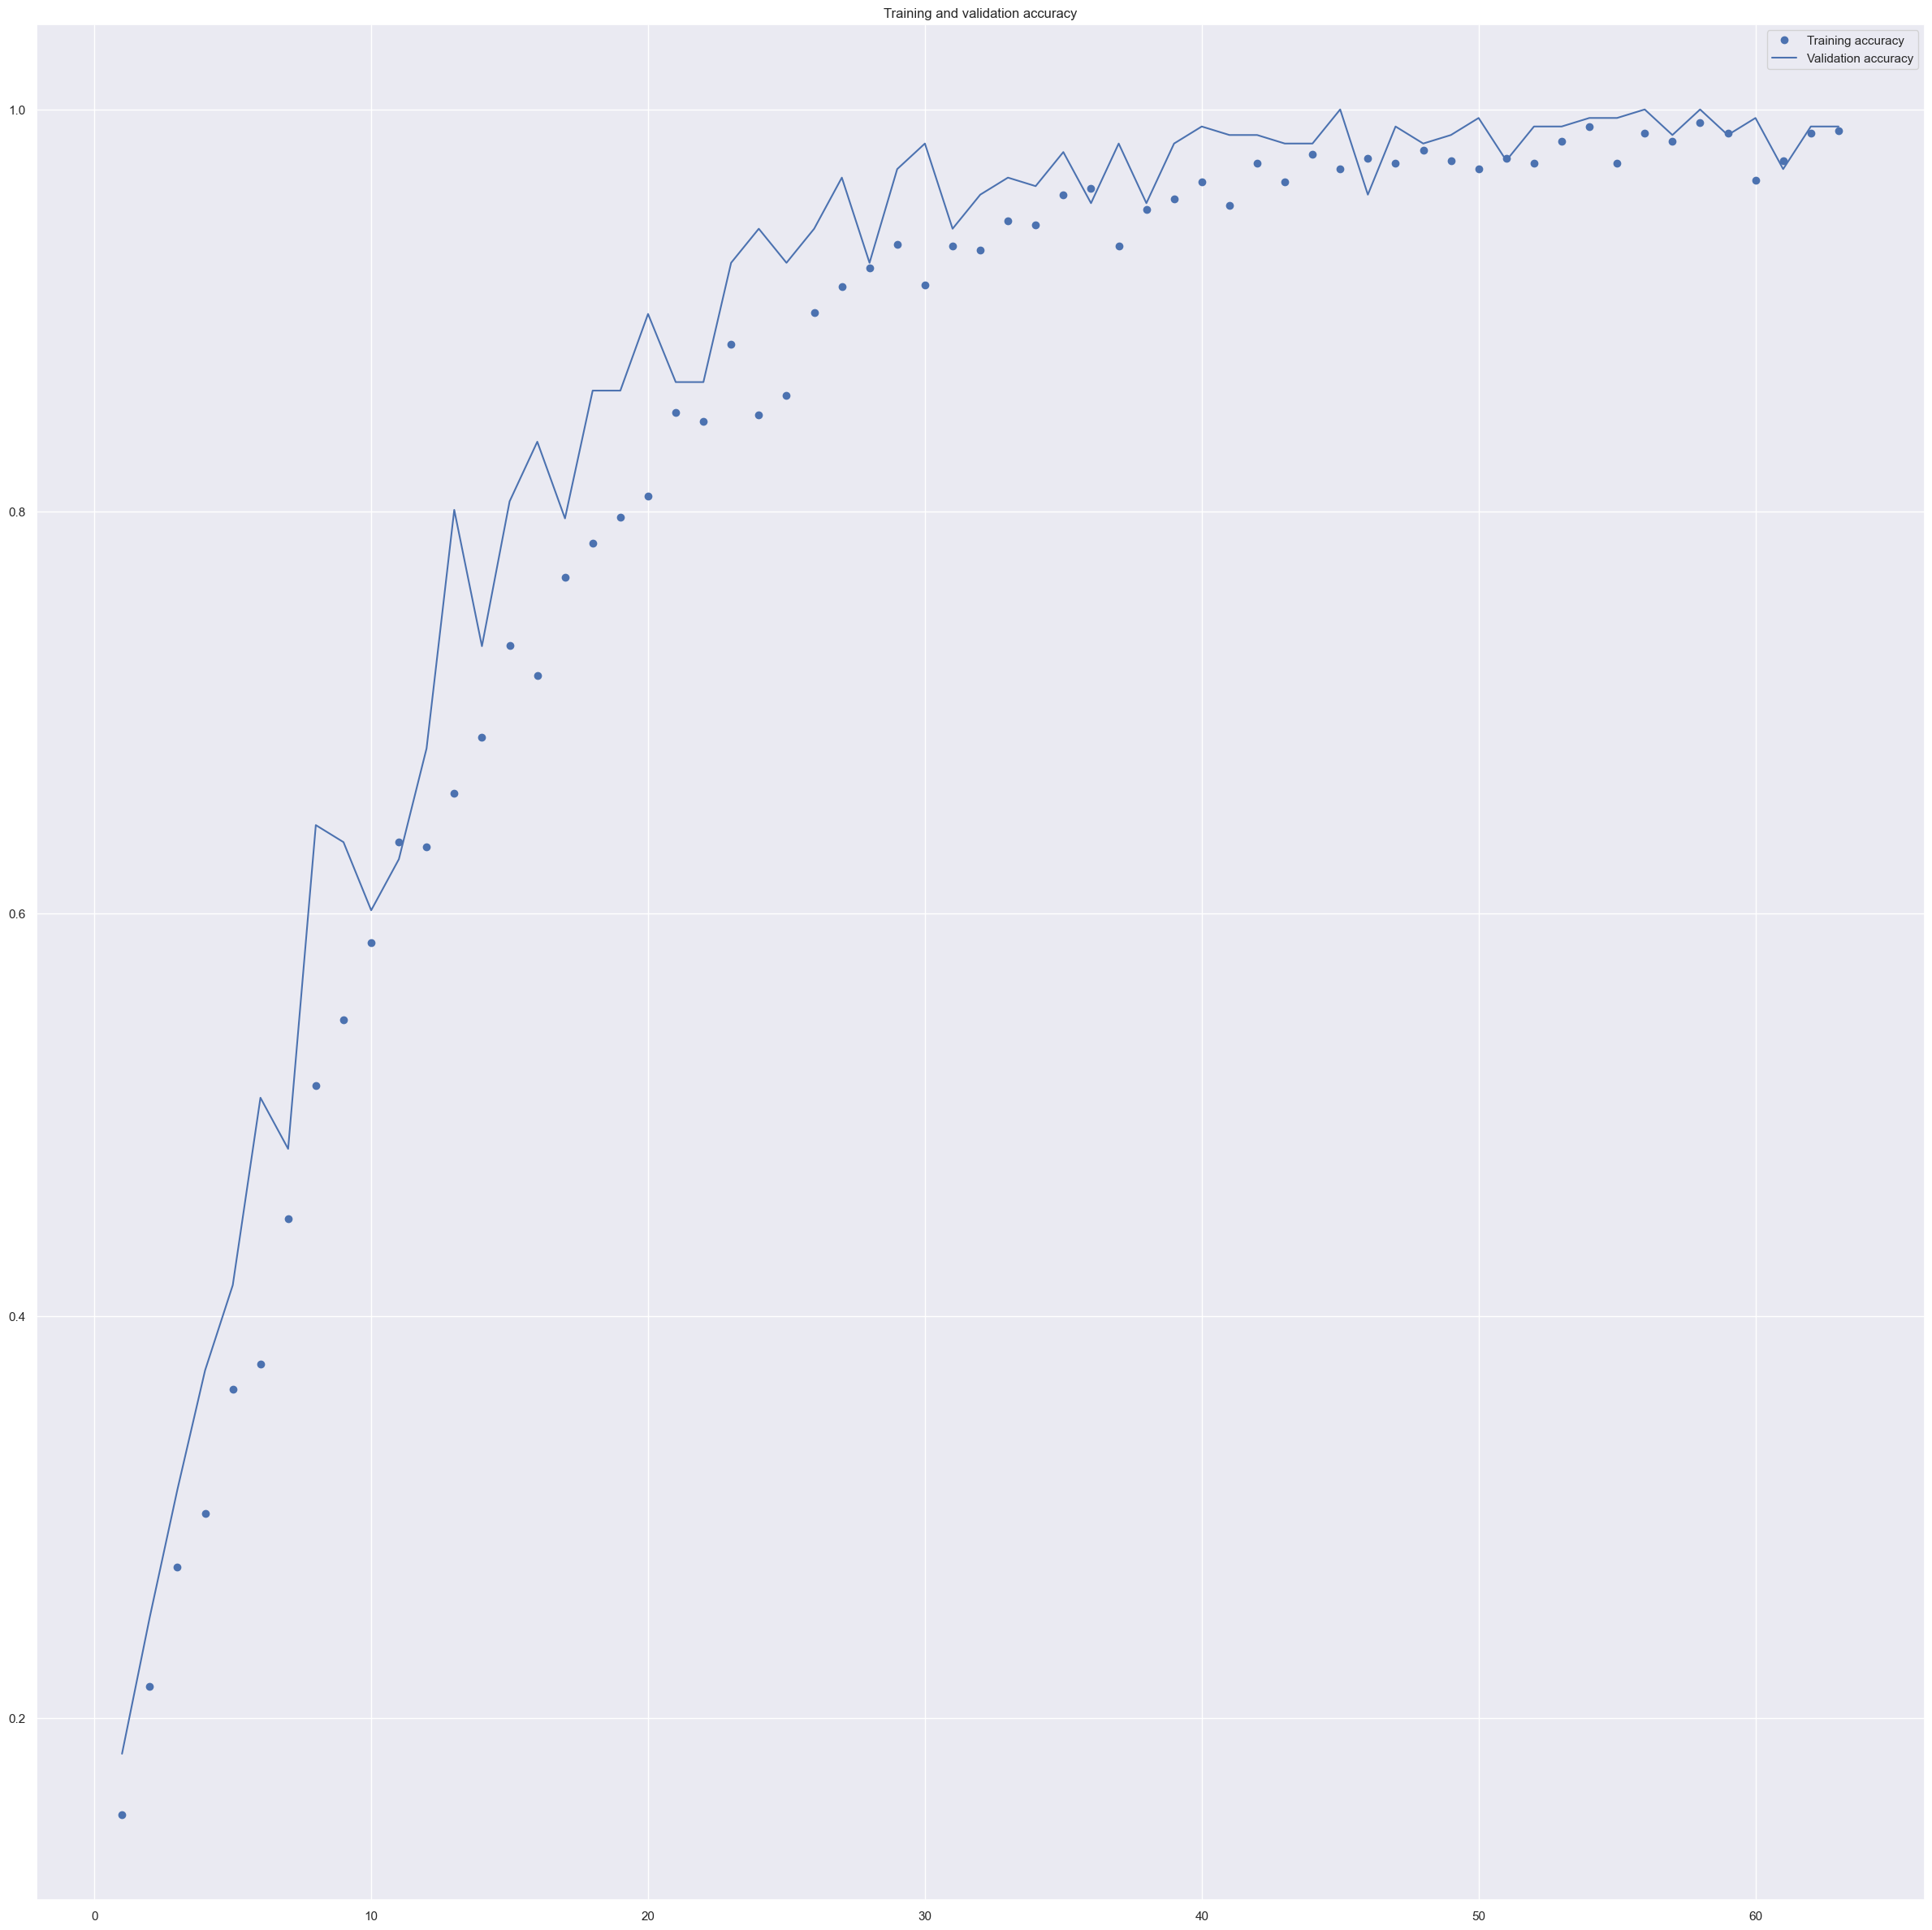

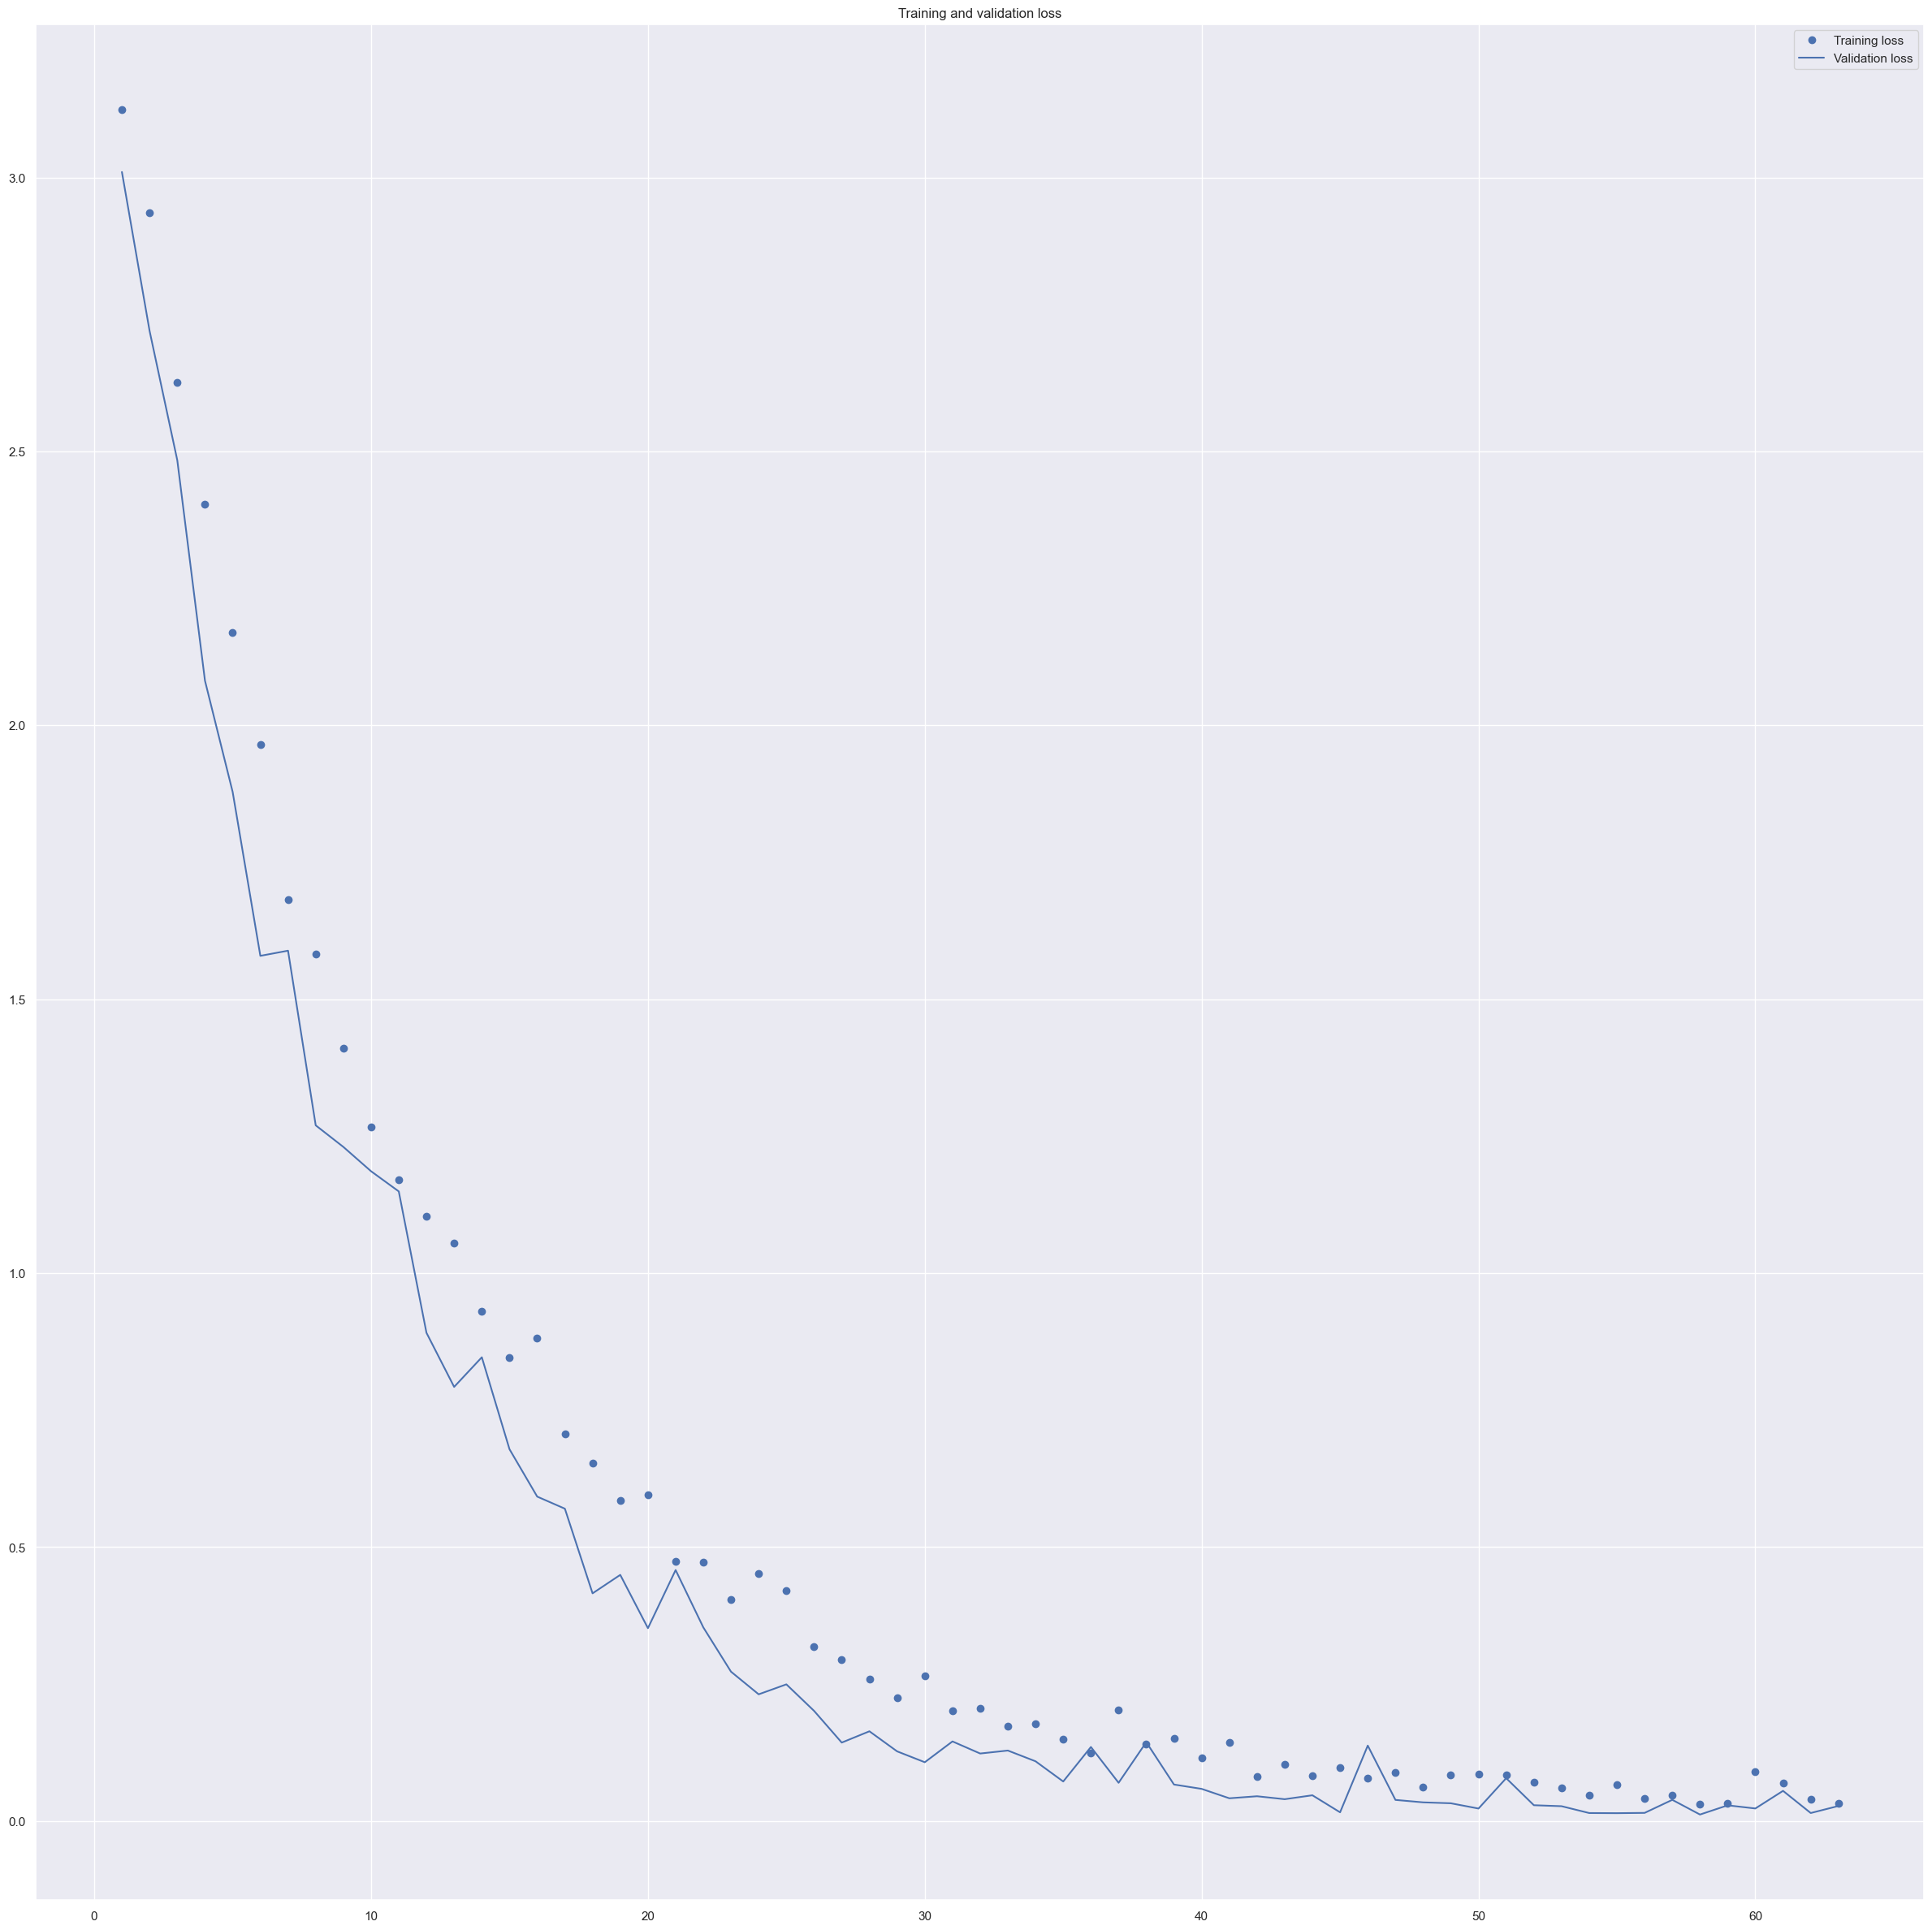

In [42]:
#Displaying curves of loss and accuracy during training


import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()